# Libraries used in Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import shapiro

In [3]:
import warnings 
warnings.filterwarnings('ignore')

# Importing dataset

In [4]:
d= pd.read_csv("road accidents data 2022.csv")

In [5]:
d.head()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


# Data summary

In [6]:
d.shape

(61352, 20)

In [7]:
d.describe()

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,61352.0,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000,61352.000000
mean,2022.0,1.450368,1.333779,1.482299,1.368790,36.670312,6.288157,2.783039,0.800316,0.645325,0.222047,0.048507,0.032860,9.475160,1.091032,4.337674
std,0.0,1.109855,0.981507,0.735614,0.534536,19.574357,2.463082,0.442318,2.197167,2.009611,0.615127,0.426419,0.261327,16.662727,0.903365,3.158496
min,2022.0,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2022.0,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2022.0,1.000000,1.000000,1.000000,1.000000,34.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2022.0,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2022.0,227.000000,148.000000,3.000000,9.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_index                      61352 non-null  object
 2   accident_year                       61352 non-null  int64 
 3   accident_reference                  61352 non-null  object
 4   vehicle_reference                   61352 non-null  int64 
 5   casualty_reference                  61352 non-null  int64 
 6   casualty_class                      61352 non-null  int64 
 7   sex_of_casualty                     61352 non-null  int64 
 8   age_of_casualty                     61352 non-null  int64 
 9   age_band_of_casualty                61352 non-null  int64 
 10  casualty_severity                   61352 non-null  int64 
 11  pedestrian_location                 61352 non-null  in

In [9]:
d.columns

Index(['status', 'accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'casualty_reference', 'casualty_class',
       'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'casualty_severity', 'pedestrian_location', 'pedestrian_movement',
       'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile', 'lsoa_of_casualty'],
      dtype='object')

## Attributes

Columns:

- Status: The status of the accident (e.g., reported, under investigation).
- Accident_Index: A unique identifier for each reported accident.
- Accident_Year: The year in which the accident occurred.
- Accident_Reference: A reference number associated with the accident.
- Vehicle_Reference: A reference number for the involved vehicle in the accident.
- Casualty_Reference: A reference number for the casualty involved in the accident.
- Casualty_Class: Indicates the class of the casualty (e.g., driver, passenger, pedestrian).
- Sex_of_Casualty: The gender of the casualty (male or female).
- Age_of_Casualty: The age of the casualty.
- Age_Band_of_Casualty: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).
- Casualty_Severity: The severity of the casualty's injuries (e.g., fatal, serious, slight).
- Pedestrian_Location: The location of the pedestrian at the time of the accident.
- Pedestrian_Movement: The movement of the pedestrian during the accident.
- Car_Passenger: Indicates whether the casualty was a car passenger at the time of the accident (yes or no).
- Bus_or_Coach_Passenger: Indicates whether the casualty was a bus or coach passenger (yes or no).
- Pedestrian_Road_Maintenance_Worker: Indicates whether the casualty was a road maintenance worker (yes or no).
- Casualty_Type: The type of casualty (e.g., driver/rider, passenger, pedestrian).
- Casualty_Home_Area_Type: The type of area in which the casualty resides (e.g., urban, rural).
- Casualty_IMD_Decile: The IMD decile of the area where the casualty resides (a measure of deprivation).
- LSOA_of_Casualty: The Lower Layer Super Output Area (LSOA) associated with the casualty's location.

# Data Cleaning

## 1.Checking null values

In [10]:
d.isnull().sum()

status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

## 2.Dropping duplicates if any

In [11]:
d.drop_duplicates()

,status,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,Unvalidated,2022070151244,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
1,Unvalidated,2022070152668,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2,Unvalidated,2022070154696,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
3,Unvalidated,2022070154696,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
4,Unvalidated,2022070154696,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,Unvalidated,2022461156711,2022,461156711,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10,E01024046
61348,Unvalidated,2022461157243,2022,461157243,1,1,3,1,14,3,2,5,9,0,0,0,0,-1,-1,-1
61349,Unvalidated,2022461157256,2022,461157256,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5,E01016034
61350,Unvalidated,2022461157316,2022,461157316,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3,E01024497


## 3.Droping unwanted columns

In [12]:
d=d.drop("status",axis=1)

In [13]:
d=d.drop("accident_index",axis=1)

In [14]:
d=d.drop("accident_year",axis=1)

## 4.Finding unique values

In [15]:
d.nunique()

accident_reference                    48283
vehicle_reference                        11
casualty_reference                       18
casualty_class                            3
sex_of_casualty                           4
age_of_casualty                         102
age_band_of_casualty                     12
casualty_severity                         3
pedestrian_location                      11
pedestrian_movement                      10
car_passenger                             5
bus_or_coach_passenger                    7
pedestrian_road_maintenance_worker        4
casualty_type                            22
casualty_home_area_type                   4
casualty_imd_decile                      11
lsoa_of_casualty                      23841
dtype: int64

## 5. Removing invalid values

### Removing invalid values from sex_of_casualty column

In [16]:
d.sex_of_casualty.nunique()

4

In [17]:
d.sex_of_casualty.unique()

array([ 2,  1, -1,  9], dtype=int64)

In [18]:
d.sex_of_casualty.value_counts()

 1    37452
 2    23442
-1      448
 9       10
Name: sex_of_casualty, dtype: int64

In [19]:
d = d[d['sex_of_casualty'] != -1]

In [20]:
d = d[d['sex_of_casualty'] != 9]

In [21]:
d.sex_of_casualty.value_counts()

1    37452
2    23442
Name: sex_of_casualty, dtype: int64

### Removing invalid values from age_of_casualty column

In [22]:
d.age_of_casualty.nunique()

102

In [23]:
d.age_of_casualty.unique()

array([ 46,  30,  58,  78,  63,  52,  50,  16,  74,  79,  13,  48,  45,
        28,  54,  42,  33,  34,   7,  20,  24,  18,  80,  14,  32,  19,
        59,  36,  84,  23,  43,  55,   5,  31,  25,  26,  21,  72,  15,
        22,  47,  86,  76,  61,  35,  51,  17,  68,  38,  73,  65,  27,
        66,  93,  77,  60,  69,  41,  67,  91,  70,  40,  29,  57,  37,
        53,  81,  -1,  12,  44,  39,  10,   8,  62,  56,  64,  49,   6,
        75,  92,   3,  11,  71,  82,   9,   4,   2,   0,  87,   1,  83,
        89,  88,  85,  96,  90,  99,  97,  94,  95,  98, 101], dtype=int64)

In [24]:
d= d[d['age_of_casualty'] != -1]

In [25]:
d.age_of_casualty.nunique()

101

### removing invalid values from rest of the columns columns

In [26]:
d= d[d['car_passenger'] != -1]

In [27]:
d= d[d['bus_or_coach_passenger'] != -1]

In [28]:
d= d[d['casualty_type'] != -1]

In [29]:
d= d[d['casualty_home_area_type'] != -1]

In [30]:
d= d[d['casualty_imd_decile'] != -1]

In [31]:
d= d[d['pedestrian_road_maintenance_worker'] != -1]

# Dataset after removing invalid values

In [32]:
d.describe()

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000,54281.000000
mean,1.453566,1.312540,1.454487,1.384094,37.754942,6.483134,2.782539,0.774028,0.624804,0.204326,0.044141,0.034911,9.504965,1.297876,4.902857
std,1.160413,0.981449,0.728889,0.486385,18.927102,2.220868,0.440888,2.159469,1.976785,0.543617,0.399941,0.258134,16.714262,0.651604,2.785208
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,23.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,35.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,5.000000
75%,2.000000,1.000000,2.000000,2.000000,51.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,227.000000,148.000000,3.000000,2.000000,101.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,2.000000,98.000000,3.000000,10.000000


In [33]:
# size of dataset after removing invalid values
d.shape

(54281, 17)

## Univariate Analysis

## 1.Which gender is  more commonly involved in accidents?

In [34]:
c=['y','r','c','k','g','b','m']

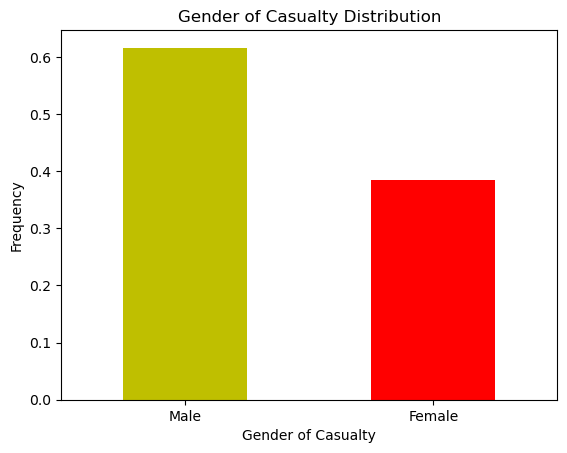

In [35]:
d.sex_of_casualty.value_counts(normalize = True).plot.bar(color=c)
plt.title('Gender of Casualty Distribution')
plt.xlabel('Gender of Casualty')
plt.ylabel('Frequency')
plt.xticks([0,1],['Male','Female'], rotation = 0)
plt.show()

## 2. What is the variation of casualty along the age of the casualty?

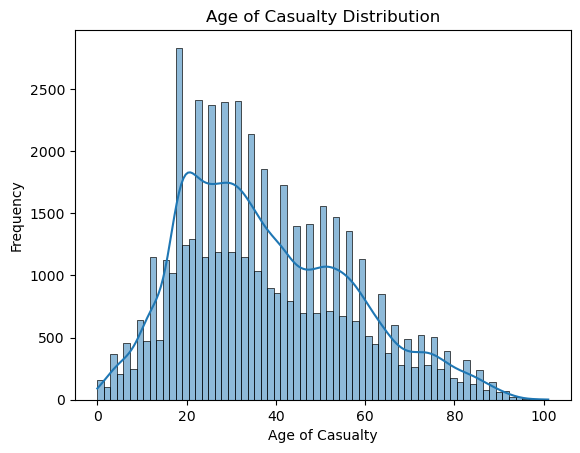

In [36]:
sns.histplot(d['age_of_casualty'],kde=True)
plt.title('Age of Casualty Distribution')
plt.xlabel('Age of Casualty')
plt.ylabel('Frequency')
plt.show()

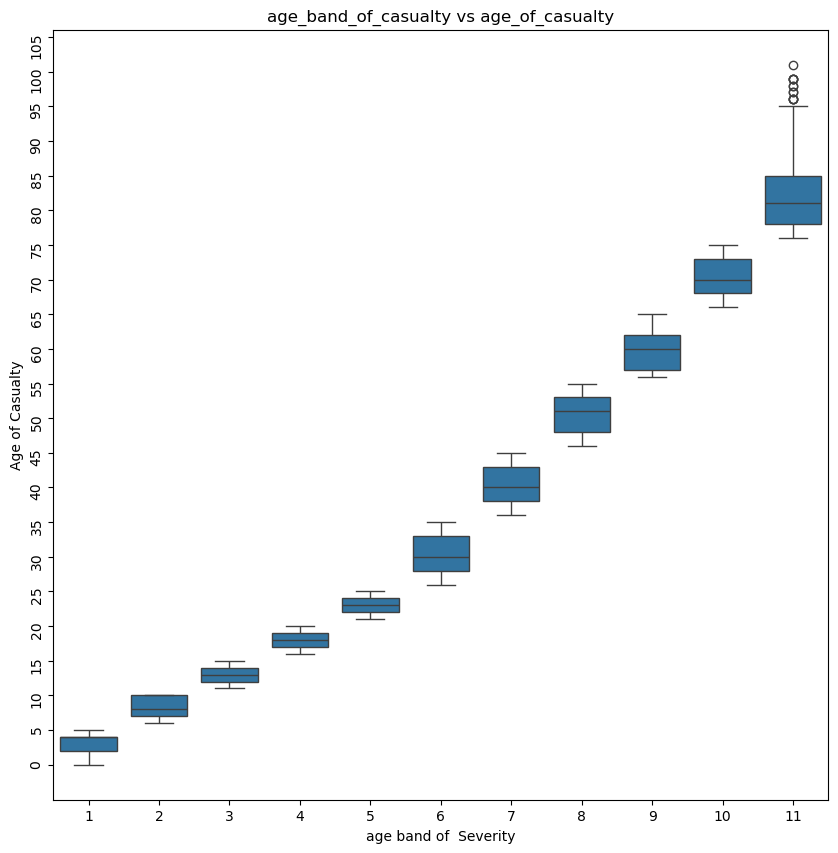

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x='age_band_of_casualty',y='age_of_casualty', data=d)
plt.title('age_band_of_casualty vs age_of_casualty')
plt.xlabel('age band of  Severity')
plt.ylabel('Age of Casualty')
plt.yticks(range(0, 110,5),rotation=90)
plt.show()

&emsp;&emsp;&emsp;Age&emsp;&emsp; vs &emsp;&emsp;Age band 

- &emsp;0-5  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;1
- &emsp;6-10  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;2
- &emsp;11-15  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;3
- &emsp;16-20  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;4
- &emsp;21-25  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;5
- &emsp;26-35  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;6
- &emsp;36-45  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;7
- &emsp;46-55  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;8
- &emsp;56-65  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;9
- &emsp;66-75  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;10
- &emsp;76-101 &emsp;&emsp;&emsp;&emsp;&emsp;&ensp;&ensp;11

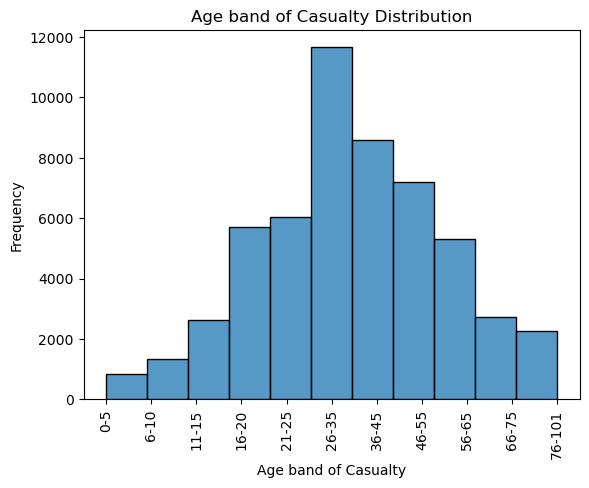

In [38]:
sns.histplot(d['age_band_of_casualty'],bins= 11)
plt.title('Age band of Casualty Distribution')
plt.xlabel('Age band of Casualty')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], ['0-5', '6-10', '11-15','16-20', '21-25','26-35','36-45', '46-55','56-65', '66-75','76-101'],rotation=90)
plt.show()

## 3. Which class of casualty (e.g. driver, passenger, pedestrian) is associated with most accidents?

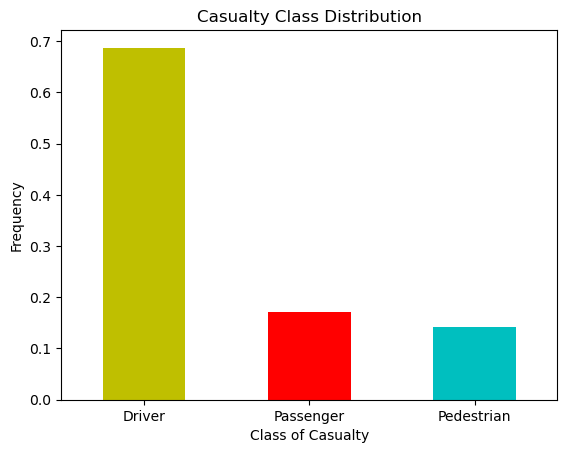

In [39]:
d.casualty_class.value_counts(normalize = True).plot.bar(color=c)
plt.title('Casualty Class Distribution')
plt.xlabel('Class of Casualty')
plt.ylabel('Frequency')
plt.xticks([0,1,2],['Driver', 'Passenger', 'Pedestrian'], rotation = 0)
plt.show()

## 4. How much severe is the condition of the person involved in the accident?

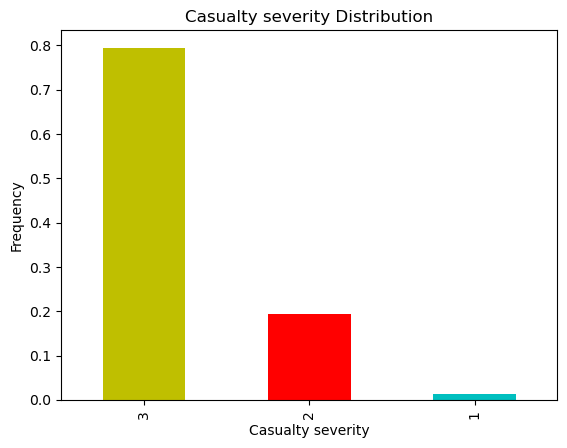

In [40]:
d.casualty_severity.value_counts(normalize = True).plot.bar(color=c)
plt.title('Casualty severity Distribution')
plt.xlabel('Casualty severity')
plt.ylabel('Frequency')
plt.show()
# 1-fatal, 2-serious, 3-slight

## 5. To which type of home area (urban, semi-urban, rural) most of the casualties belong? 

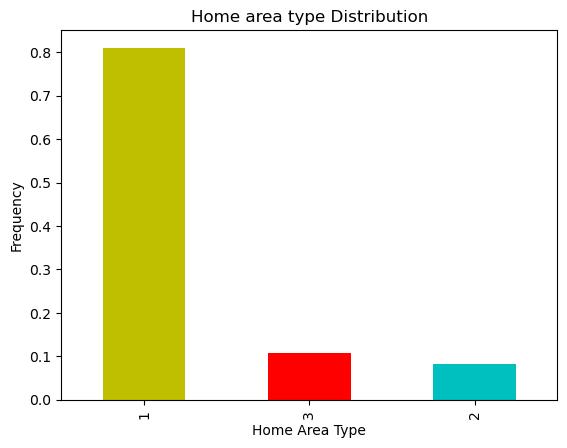

In [41]:
d.casualty_home_area_type.value_counts(normalize = True).plot.bar(color=c)
plt.title('Home area type Distribution')
plt.xlabel('Home Area Type')
plt.ylabel('Frequency')
plt.show()
# 1-Urban, 2-Semi-Urban, 3-rural

## 6. How is the casualty varied along the IMD Decile And What does it indicate ?

In [42]:
# A decile of 1 means the postcode is in the bottom 10% of the deprivation index
# A decile of 2 means the postcode is in the bottom 20%, and so on.

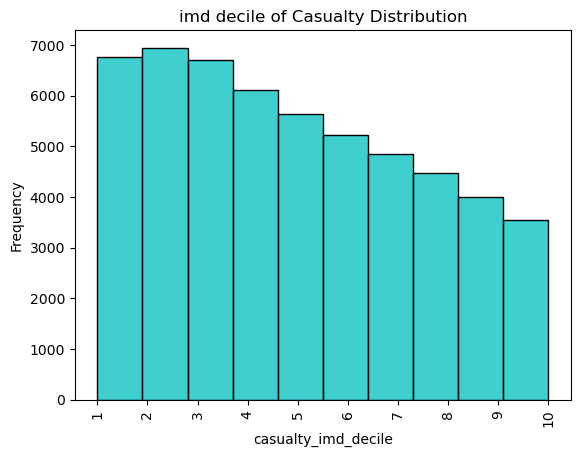

In [43]:
sns.histplot(d['casualty_imd_decile'],bins= 10, color = 'c')
plt.title('imd decile of Casualty Distribution')
plt.xlabel('casualty_imd_decile')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5,6,7,8,9,10], ['1','2','3','4','5','6','7','8','9','10'],rotation=90)
plt.show()

# Bivariate analysis

## 1. Which class of casualty (e.g. driver, passenger, pedestrian) is associated with most severity?

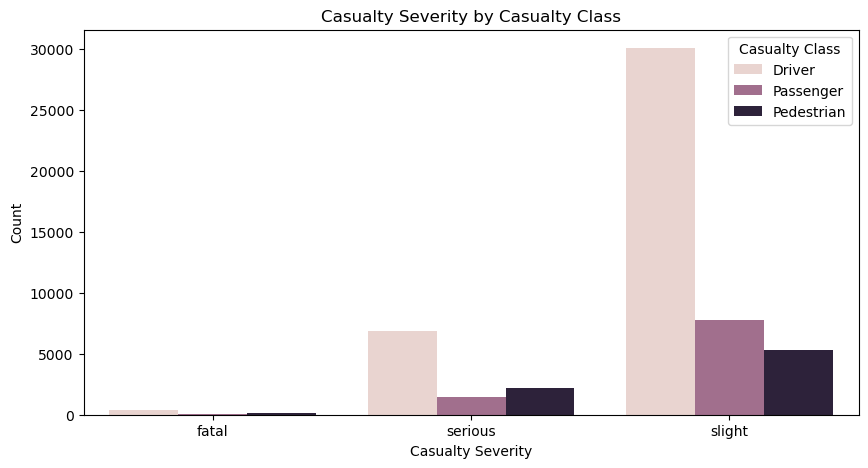

In [44]:
plt.figure(figsize=(10, 5))  

sns.countplot(x='casualty_severity', hue='casualty_class', data=d)
plt.title('Casualty Severity by Casualty Class')
plt.xlabel('Casualty Severity')
plt.ylabel('Count')
plt.xticks([0,1,2], ['fatal', 'serious', 'slight'])
plt.legend(title='Casualty Class', labels=['Driver', 'Passenger', 'Pedestrian'])

plt.show()

## 2. How is the severity of accident varied along the gender of the casualty ?

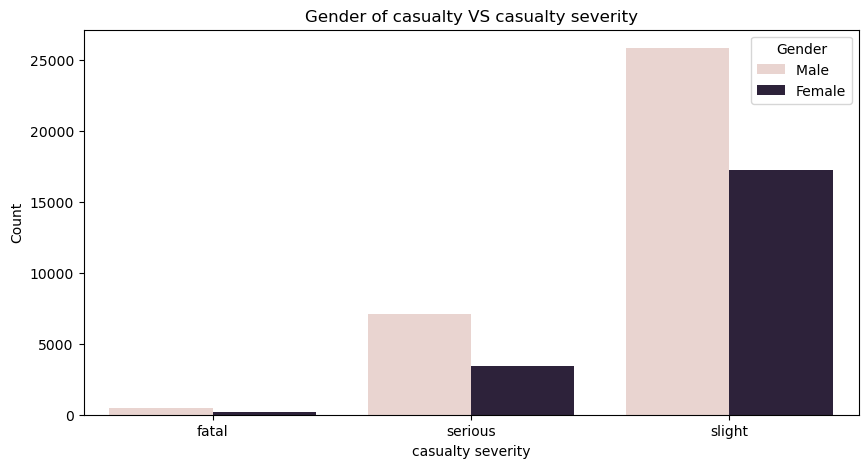

In [45]:
plt.figure(figsize=(10, 5)) 

sns.countplot(data=d, x="casualty_severity", hue="sex_of_casualty")
plt.title("Gender of casualty VS casualty severity")
plt.xlabel("casualty severity")
plt.ylabel("Count")
plt.xticks([0,1,2], ['fatal', 'serious', 'slight'])
plt.legend(title='Gender', labels=['Male ', 'Female'])
plt.show()

##  Heatmap to visualize distribution of casualty on the basis of casualty severity and gender of the casualty

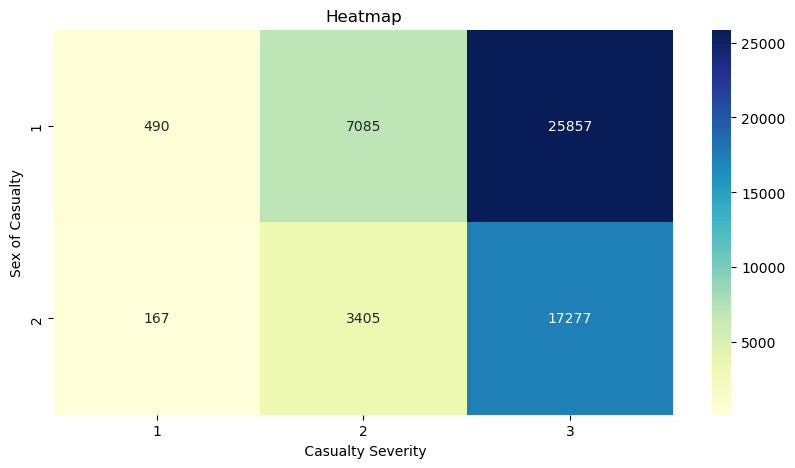

In [46]:
pivot_table = d.pivot_table(index='sex_of_casualty', columns='casualty_severity', values='casualty_reference', aggfunc='count')

# heatmap to visualize the data
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap')
plt.xlabel(' Casualty Severity')
plt.ylabel('Sex of Casualty')
plt.show()

## 3. How is the severity of accident varied along the age of the casualty ?

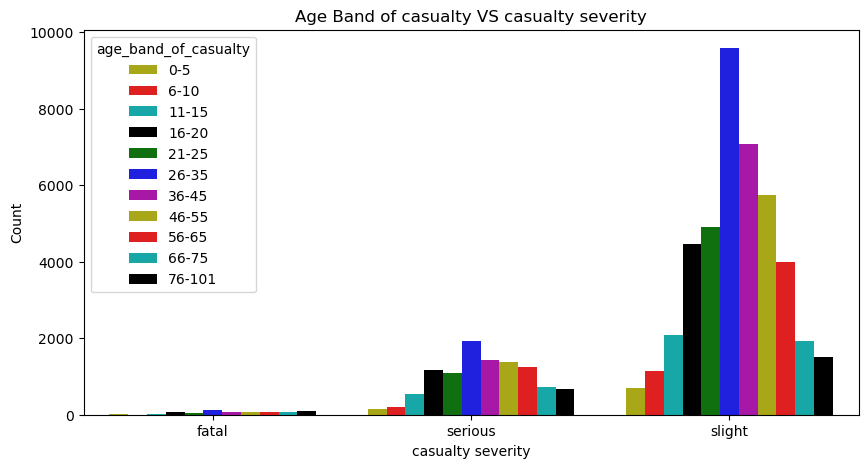

In [47]:
plt.figure(figsize=(10, 5))  

sns.countplot(x='casualty_severity', hue='age_band_of_casualty', data=d,palette= c )
plt.title("Age Band of casualty VS casualty severity")
plt.xlabel("casualty severity")
plt.ylabel("Count")
plt.xticks([0,1,2],['fatal', 'serious', 'slight'])
plt.legend(title="age_band_of_casualty", labels=['0-5', '6-10', '11-15','16-20', '21-25','26-35','36-45', '46-55','56-65', '66-75','76-101'])
plt.show()

## 4. How  severe are the injuries of accident in each home area type of the casualty ?

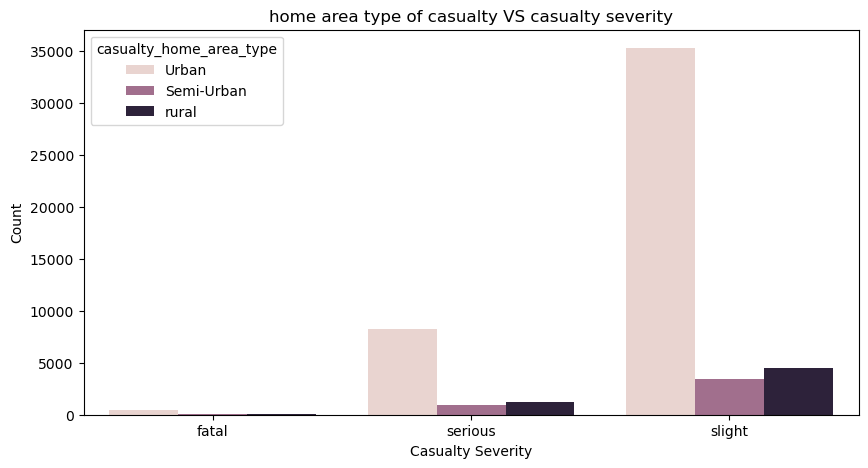

In [48]:
plt.figure(figsize=(10, 5))  

sns.countplot(data=d, x="casualty_severity", hue="casualty_home_area_type" )
plt.title("home area type of casualty VS casualty severity")
plt.xlabel("Casualty Severity")
plt.ylabel("Count")
plt.xticks([0,1,2],['fatal', 'serious', 'slight'])
plt.legend(title="casualty_home_area_type", labels=['Urban', 'Semi-Urban', 'rural'])
plt.show()

## 5. What is the relation between casualty severity and imd decile of casualty ?

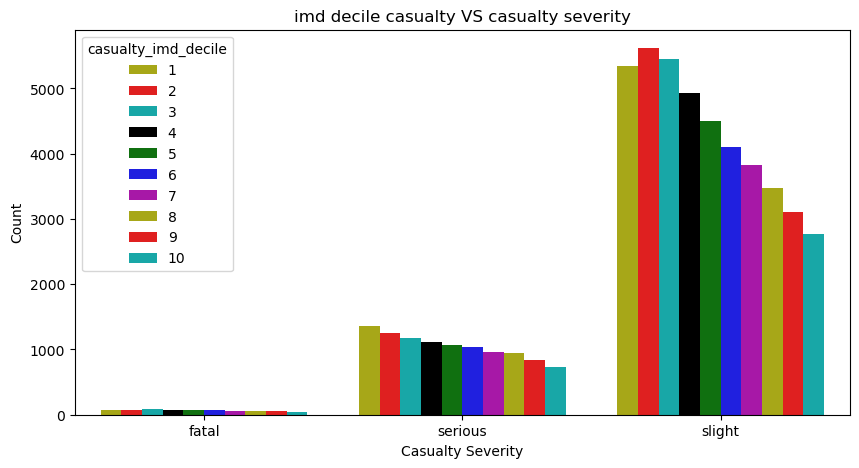

In [49]:
plt.figure(figsize=(10, 5))  

sns.countplot(data=d, x="casualty_severity", hue="casualty_imd_decile", palette=c)
plt.title("imd decile casualty VS casualty severity")
plt.xlabel("Casualty Severity")
plt.ylabel("Count")
plt.xticks([0,1,2],['fatal', 'serious', 'slight'])
plt.legend(title="casualty_imd_decile", labels=['1','2','3','4','5','6','7','8','9','10'])
plt.show()

## 6. To which  Casualty class does  each age group of the casualty belong?

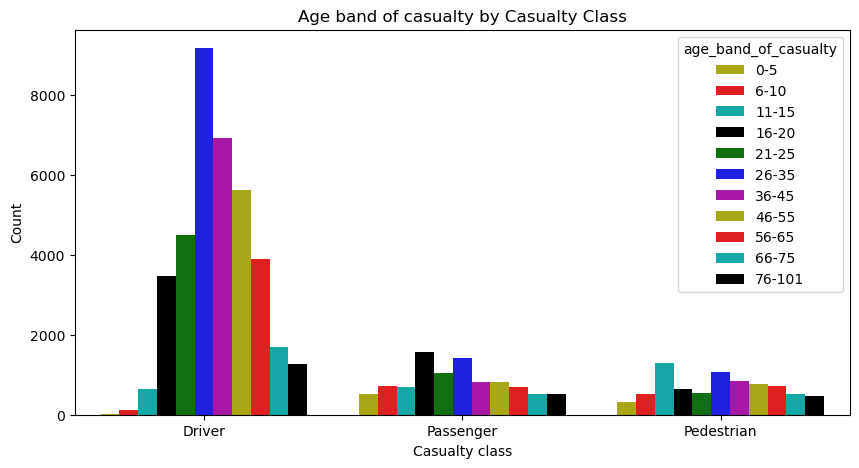

In [50]:
plt.figure(figsize=(10, 5))
sns.countplot(x='casualty_class', hue='age_band_of_casualty', data=d,palette=c)
plt.title('Age band of casualty by Casualty Class')
plt.xlabel('Casualty class')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Driver', 'Passenger', 'Pedestrian'])
plt.legend(title="age_band_of_casualty", labels=['0-5', '6-10', '11-15','16-20', '21-25','26-35','36-45', '46-55','56-65', '66-75','76-101'])
plt.show()

## 7. How is the Casualty class varied along the gender of casualty?

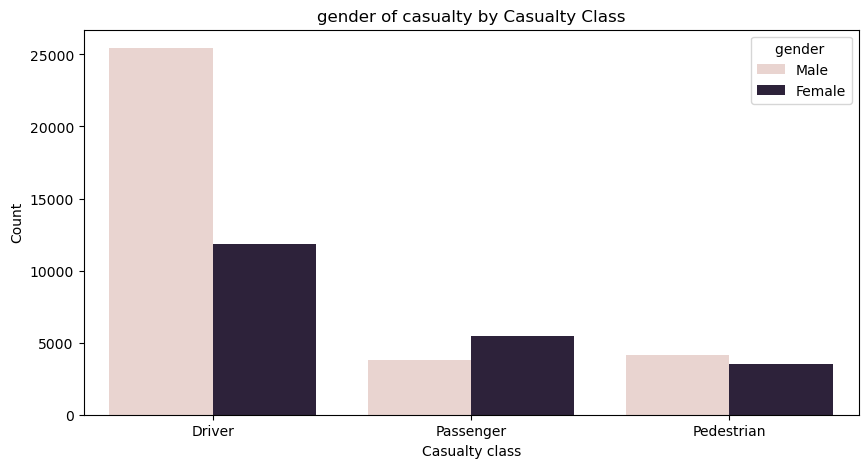

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x='casualty_class', hue='sex_of_casualty', data=d)
plt.title('gender of casualty by Casualty Class')
plt.xlabel('Casualty class')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Driver', 'Passenger', 'Pedestrian'])

plt.legend(title='gender ', labels=['Male' , 'Female'])
plt.show()

## 8. How is the class of casualty varied along the home area type?

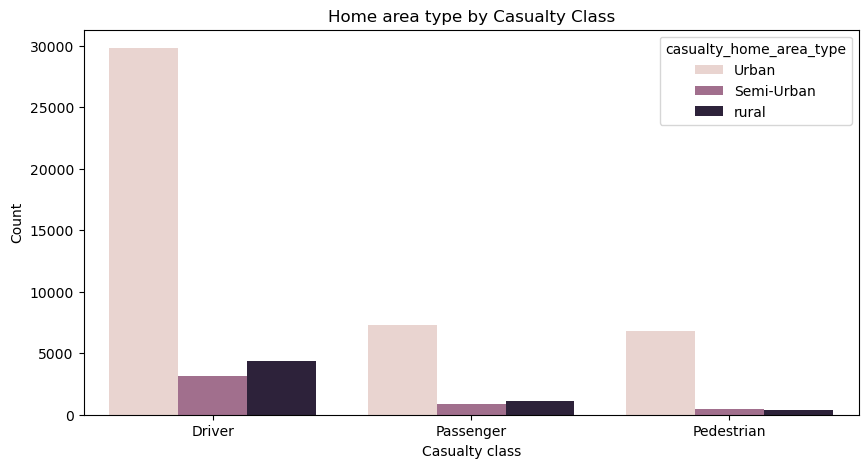

In [52]:
plt.figure(figsize=(10, 5))
sns.countplot(x='casualty_class', hue='casualty_home_area_type', data=d)
plt.title('Home area type by Casualty Class')
plt.xlabel('Casualty class')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Driver', 'Passenger', 'Pedestrian'])
plt.legend(title='casualty_home_area_type', labels=['Urban', 'Semi-Urban', 'rural'])
plt.show()

## 9. What is the relation between  gender and the home area type of casualty ?

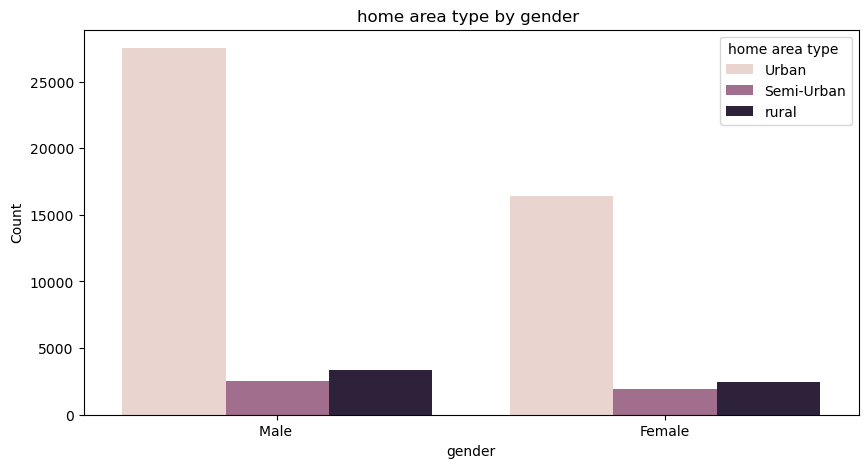

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(x='sex_of_casualty', hue='casualty_home_area_type', data=d)
plt.title('home area type by gender ')
plt.xlabel('gender')
plt.ylabel('Count')
plt.xticks([0,1], ['Male ', 'Female'])

plt.legend(title='home area type ', labels=['Urban', 'Semi-Urban', 'rural'])
plt.show()

## 10. How does casualty imd decile varies along Casualty class?

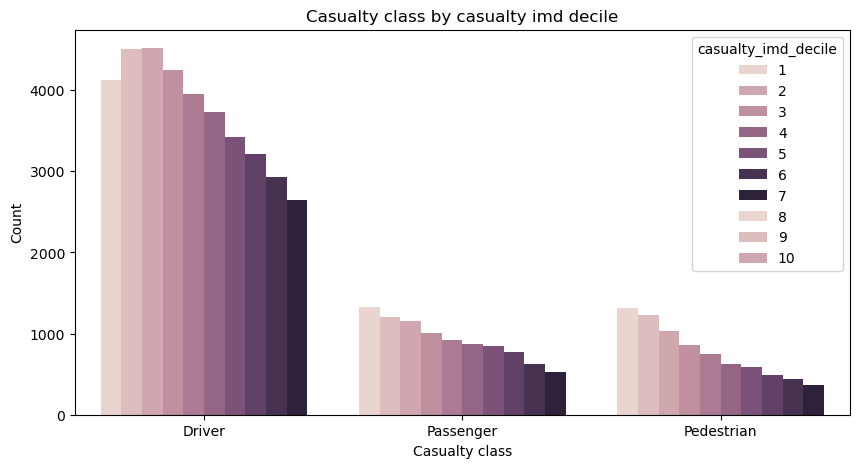

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x='casualty_class', hue='casualty_imd_decile', data=d)
plt.title('Casualty class by casualty imd decile')
plt.xlabel('Casualty class')
plt.ylabel('Count')
plt.xticks([0,1,2], ['Driver', 'Passenger', 'Pedestrian'])
plt.legend(title='casualty_imd_decile', labels=['1','2','3','4','5','6','7','8','9','10'])
plt.show()

## 11. How does casualty imd decile varies along casualty home area type ?

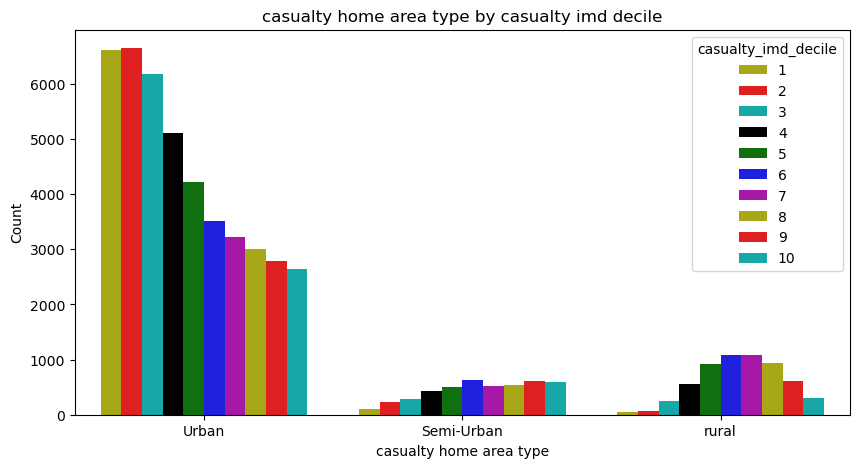

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(x='casualty_home_area_type', hue='casualty_imd_decile', data=d, palette=c)
plt.title('casualty home area type by casualty imd decile')
plt.xlabel('casualty home area type')
plt.ylabel('Count')
plt.xticks([0,1,2],['Urban', 'Semi-Urban', 'rural'])
plt.legend(title="casualty_imd_decile", labels=['1', '2','3','4','5','6','7','8','9','10'])
plt.show()

## 12. What is the relationship b/w imd decile and gender of the casualty involved?

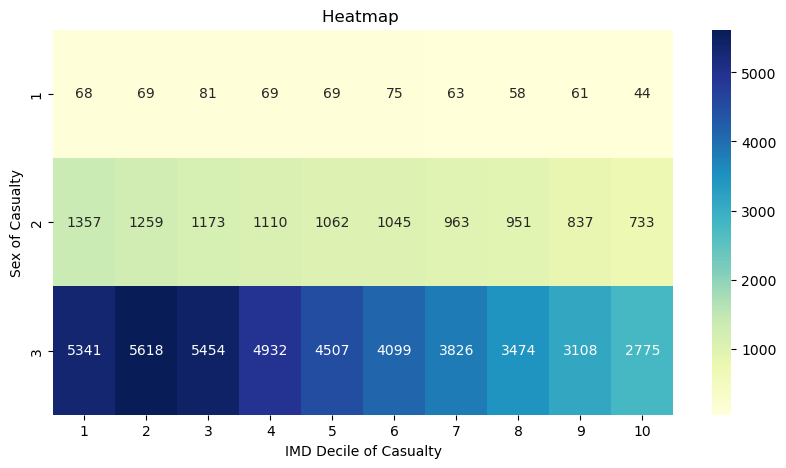

In [56]:
pivot_table = d.pivot_table(index='casualty_severity', columns='casualty_imd_decile', values='casualty_reference', aggfunc='count')

# heatmap to visualize the data
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap ')
plt.xlabel('IMD Decile of Casualty')
plt.ylabel('Sex of Casualty')
plt.show()
# y axis --> 1-male, 2-female

## 13. Heatmap to visualize distribution of casualty on the basis of casualty severity and gender of the casualty

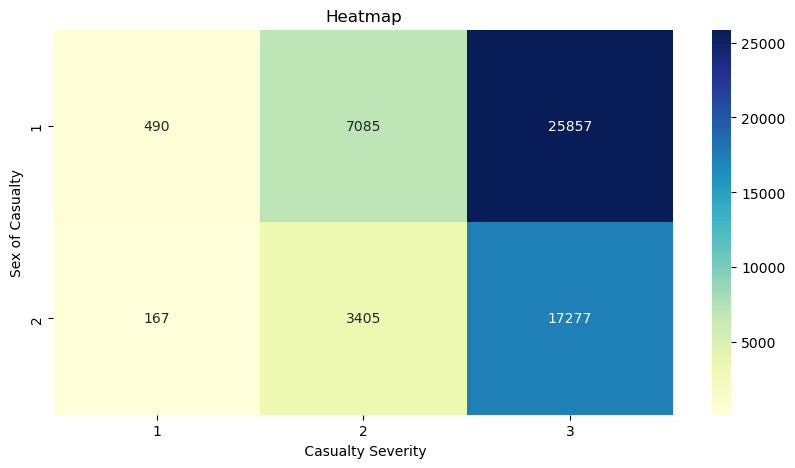

In [57]:
pivot_table = d.pivot_table(index='sex_of_casualty', columns='casualty_severity', values='casualty_reference', aggfunc='count')

# heatmap to visualize the data
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap')
plt.xlabel(' Casualty Severity')
plt.ylabel('Sex of Casualty')
plt.show()
# x axis --> 1-fatal, 2-serious, 3-slight
# y axis --> 1-male, 2-female

## 14. Heatmap to visualize distribution of casualty on the basis of casualty severity and age band of the casualty

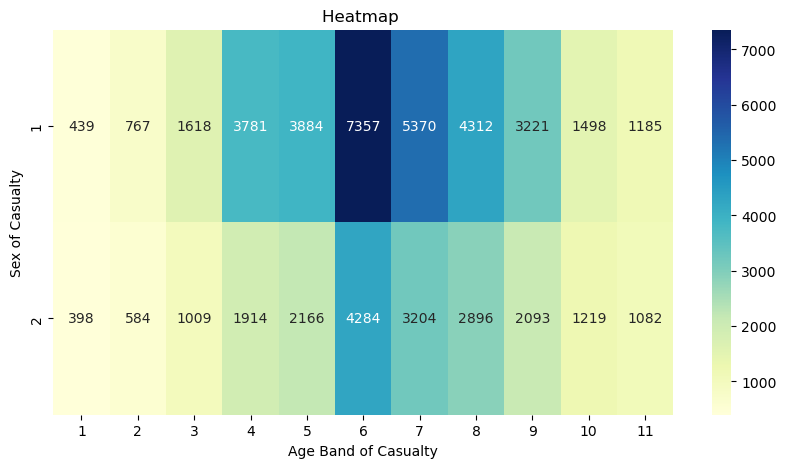

In [58]:
pivot_table = d.pivot_table(index='sex_of_casualty', columns='age_band_of_casualty', values='casualty_reference', aggfunc='count')

# heatmap to visualize the datacasualty_severity", hue="casualty_imd_decile
plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap ')
plt.xlabel('Age Band of Casualty')
plt.ylabel('Sex of Casualty')
plt.show()
# y axis --> 1-male, 2-female

# Multivariate Analysis 

## 1. Stacked bar graph of casualty class on the  basis of gender and age band of casualty

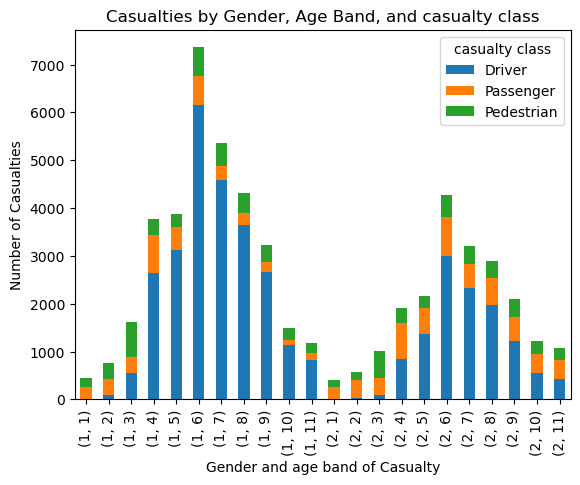

In [59]:
grouped_data = d.groupby(['sex_of_casualty', 'age_band_of_casualty', 'casualty_class']).size().unstack().fillna(0)

#stacked bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel("Gender and age band of Casualty")
plt.ylabel("Number of Casualties")
plt.title("Casualties by Gender, Age Band, and casualty class")
plt.legend(title='casualty class',labels=['Driver', 'Passenger', 'Pedestrian'], bbox_to_anchor=(1, 1))
plt.show()


## 2. Stacked bar graph of casualty severity on the  basis of gender and age band of casualty

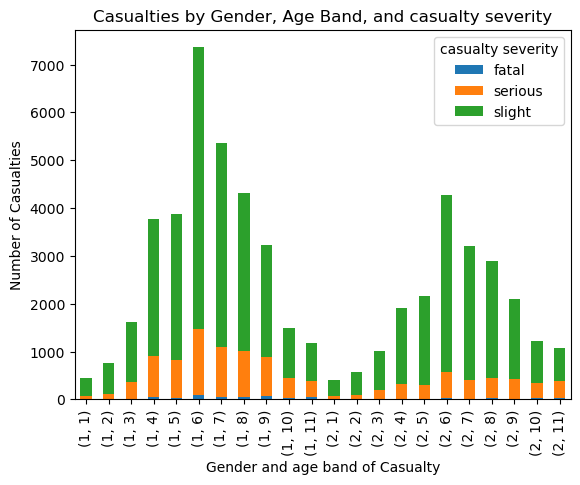

In [60]:
grouped_data = d.groupby(['sex_of_casualty', 'age_band_of_casualty', 'casualty_severity']).size().unstack().fillna(0)

#stacked bar chart
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel("Gender and age band of Casualty")
plt.ylabel("Number of Casualties")
plt.title("Casualties by Gender, Age Band, and casualty severity")
plt.legend(title='casualty severity', labels=['fatal', 'serious', 'slight'],bbox_to_anchor=(1, 1))
plt.show()

# Distribution

## 1. Visualzing the distribution of age of casualty 

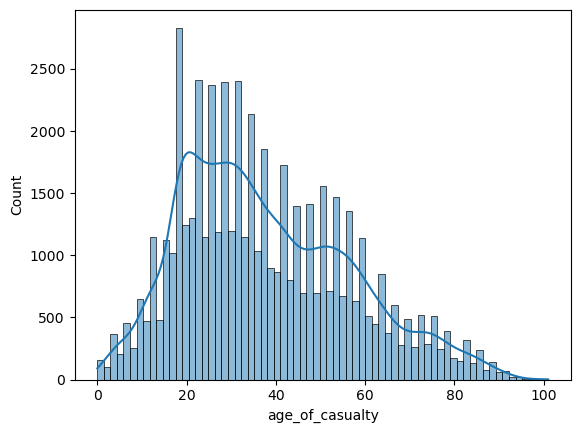

In [60]:
sns.histplot(d['age_of_casualty'],kde=True)
plt.show()

## 2. Plotting normal distribution over age of casualty 

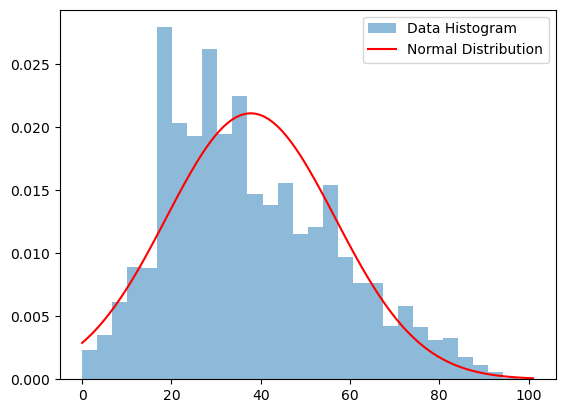

In [61]:
data = d['age_of_casualty']

# Visual inspection
plt.hist(data, bins=30, density=True, alpha=0.5, label='Data Histogram')
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, np.mean(data), np.std(data)), 'r-', label='Normal Distribution')
plt.legend()
plt.show()



### As it can be visualized that the data is not following  normal distribution

## 3. Checking skewedness of age of casualty column

In [62]:
# Check skewness
skewness = skew(data)
if skewness > 0:
    print(f"The data is right-skewed (positively skewed). Skewness value: {skewness:.2f}")
elif skewness < 0:
    print(f"The data is left-skewed (negatively skewed). Skewness value: {skewness:.2f}")
else:
    print("The data is approximately symmetric.")


The data is right-skewed (positively skewed). Skewness value: 0.54


## Therefore the distribution of data is right skewed distribution  

# Hypothesis Testing 

## 1.Normality test using Shapiro-Wilk Test : tests If data is normally distributed 

Lets assume that the distribution  follows normal distribution 

In [63]:
data = d['age_of_casualty']

stat, p = shapiro(data)

print('stat=%.20f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.96977388858795166016, p=0.0000000000
Not a normal distribution


## 2.T Test

### comparing mean age of the casualty of male and female

Lets assume mean age of casualty of both male and female have no major difference  

In [64]:
male  = d.age_of_casualty[d.sex_of_casualty == 1]  # age of casualty for male 
female = d.age_of_casualty[d.sex_of_casualty == 2] # age of casualty for female

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(male , female)

if p_value < 0.05:
    print("Reject the null hypothesis. The means of age of casualty of both male and female are significantly different.")
else:
    print("Fail to reject the null hypothesis. No significant difference in age of casualty of both male and female.")

Reject the null hypothesis. The means of age of casualty of both male and female are significantly different.


## 3. F Test

### comparing  variance in age of the casualty for driver, passenger and pedestrian

Lets assume there is no significant difference in variances of age of the casualty for each group

In [65]:
driver = d.age_of_casualty[d.casualty_class == 1]
passenger = d.age_of_casualty[d.casualty_class == 2]
pedestrian = d.age_of_casualty[d.casualty_class == 3]

# Perform an F-test (variance ratio test)
f_stat, p_value = stats.f_oneway(driver, passenger , pedestrian)

if p_value < 0.05:
    print("Reject the null hypothesis. At least one class has a significantly different variance in age of the casualty.")
else:
    print("Fail to reject the null hypothesis. No significant difference in variances of age of the casualty.")

Reject the null hypothesis. At least one class has a significantly different variance in age of the casualty.
